In [1]:
%load_ext tikzmagic
%matplotlib inline

# 과최적화와 정규화

In [2]:
import statsmodels.api as sm

boston = sm.datasets.get_rdataset("Boston", "MASS").data
boston_train = boston.iloc[:100]
boston_test = boston.iloc[100:]

In [3]:
N = 8

x_name = "lstat"
formula = f"medv ~ scale({x_name})"
result1 = sm.OLS.from_formula(formula, boston_train).fit()
results = {1: result1}
for i in range(2, N + 1):
    formula += f" + scale(I({x_name} ** {i}))"
    result_i = sm.OLS.from_formula(formula, boston_train).fit()
    results[i] = result_i

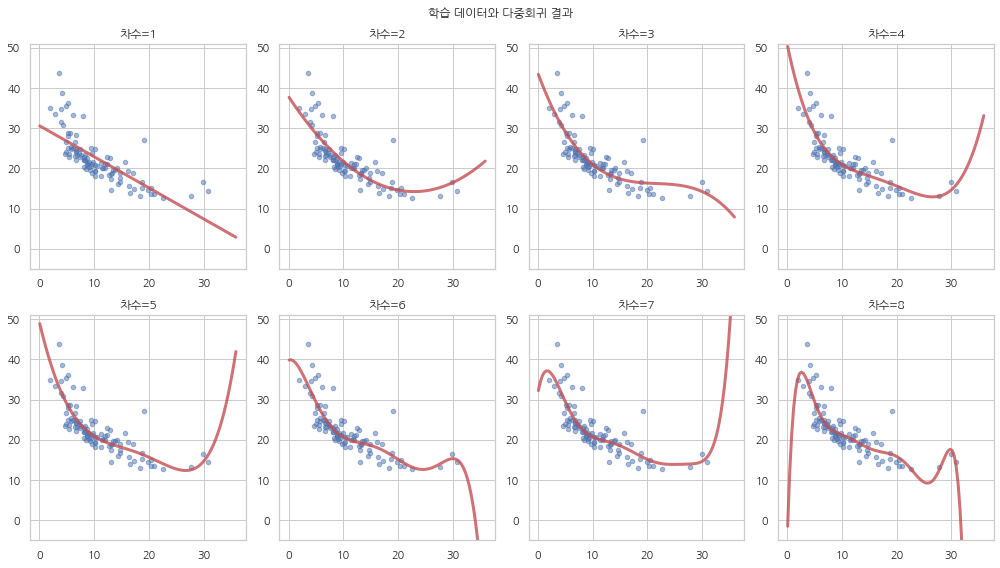

In [4]:
import pandas as pd

def plot_train(results, i, subplot):
    r_i = results[i]
    x = pd.DataFrame({x_name: np.linspace(0.1, 35.9, 100)})
    y = r_i.get_prediction(x).summary_frame()

    plt.subplot(*subplot)
    plt.scatter(boston_train[x_name], boston_train["medv"], marker='o', s=20, alpha=0.5)
    plt.plot(x[x_name].values, y["mean"].values, lw=3, alpha=0.8, c="r")
    plt.ylim(-5, 51)
    plt.title(f"차수={i}")

plt.figure(figsize=(14, 8))
for i in range(1, 9):
    plot_train(results, i, [2, 4, i])
plt.suptitle("학습 데이터와 다중회귀 결과")
plt.tight_layout()
plt.show()

In [5]:
df_rss = pd.DataFrame.from_records(
    [(i, r.rsquared, r.ssr) for i, r in results.items()],
    columns=["차수", "학습 결정계수", "학습 잔차제곱합"]
).set_index("차수")

df_rss.style.bar()

,학습 결정계수,학습 잔차제곱합
차수,,
1,0.553373,1553.790601
2,0.686105,1092.022691
3,0.710969,1005.522571
4,0.723554,961.739072
5,0.723823,960.802511
6,0.728595,944.200845
7,0.729950,939.488687
8,0.740790,901.775330


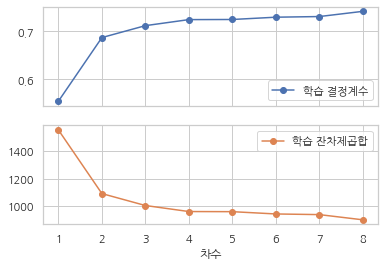

In [6]:
df_rss.plot(y=["학습 결정계수", "학습 잔차제곱합"], marker="o", subplots=True)
plt.show()

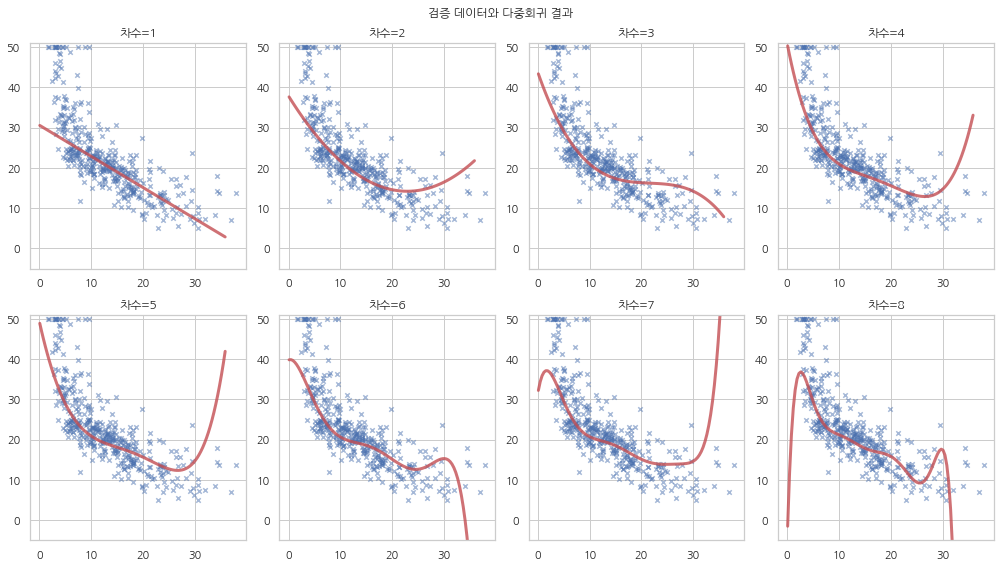

In [7]:
def plot_test(results, i, subplot):
    r_i = results[i]
    x = pd.DataFrame({x_name: np.linspace(0.1, 35.9, 100)})
    y = r_i.get_prediction(x).summary_frame()

    plt.subplot(*subplot)
    plt.scatter(boston_test[x_name], boston_test["medv"], marker='x', s=20, alpha=0.5)
    plt.plot(x[x_name].values, y["mean"].values, lw=3, alpha=0.8, c="r")
    plt.ylim(-5, 51)
    plt.title(f"차수={i}")

plt.figure(figsize=(14, 8))
for i in range(1, 9):
    plot_test(results, i, [2, 4, i])
plt.suptitle("검증 데이터와 다중회귀 결과")
plt.tight_layout()
plt.show()

In [8]:
rss_test = []
for i, r in results.items():
    y_true = boston_test.medv
    y_pred = r.get_prediction(boston_test).predicted_mean
    rss_test.append(((y_true - y_pred) ** 2).sum())

df_rss["검증 잔차제곱합"] = rss_test
df_rss[["검증 잔차제곱합"]].style.bar()

,검증 잔차제곱합
차수,
1,20145.399074
2,17656.438628
3,16362.769041
4,18075.527274
5,21171.613313
6,32154.412838
7,49392.894713
8,5070235.057569


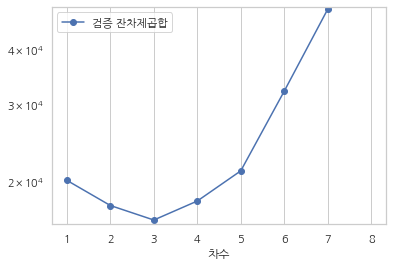

In [9]:
df_rss.plot(y=["검증 잔차제곱합"], logy=True, marker="o")
plt.ylim(1.6e4, 5e4)
plt.show()